# numpy array 简介

## Dimensions

![](images/np_arr_dim.png)

In [13]:
import numpy as np
np.arange(18)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

1D array

In [15]:
arr1d = np.array([1,2,3])
print("1D array ", arr1d.shape, ":\n", arr1d)

1D array  (3,) :
 [1 2 3]


2D array

In [24]:
arr2d1 = np.array([[1,2,5], [2,4,6]])
print("2D array:", arr2d1.shape, ":\n", arr2d1, "\n\n")
# 3D array
arr2d2 = np.array([[1,2,5], [2,4,6],[10,20,40]])
print("2D array ", arr2d2.shape, ": \n", arr2d2)

2D array: (2, 3) :
 [[1 2 5]
 [2 4 6]] 


2D array  (3, 3) : 
 [[ 1  2  5]
 [ 2  4  6]
 [10 20 40]]


3D array

In [25]:
arr3d = np.zeros((2, 4, 3))
print("3D array Dimension ", arr3d.shape, ": \n", arr3d)

3D array Dimension  (2, 4, 3) : 
 [[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


nD array

In [8]:
arrnd = np.zeros((2, 4, 3, 5))
print("nD array Dimension ", arrnd.shape, "array: \n", arrnd)
# arr = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]], [[13,14,1], [1, 2,3]]])
# arr

nD array Dimension  (2, 4, 3, 5) array: 
 [[[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]]


Check Number of Dimensions:

In [10]:
print(arr3d.ndim) 

3


In [11]:
print(arr3d.shape)

(2, 4, 3)


## Access elements

**index start with 0.**

In [26]:
array = np.array([1, 2, 3, 4, 5])

the fisrt one

In [27]:
array[0]

1

the last one

In [28]:
array[-1]

5

multiple elements

In [29]:
print(array[:3])

[1 2 3]


第2和5，注意双[[

In [30]:
print(array[[1,4]])

[2 5]


也可以加step选择

In [31]:
array[1:5:2]

array([2, 4])

![](images/np_arr_accesss.png)

In [32]:
array[::2]

array([1, 3, 5])

条件过滤

In [33]:
rand = np.random.randint(low=-5, high=5, size=10)
rand
rand[rand>0]

array([2, 4, 1])

### Two-Dimensional Arrays

In [34]:
array2d = np.arange(1,16,1).reshape(3,5)
array2d

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

当成1D array，array中的array：

array2d[:2]

with step

In [35]:
array2d[:2:2]

array([[1, 2, 3, 4, 5]])

2D array

In [36]:
array2d[:2,3:]

array([[ 4,  5],
       [ 9, 10]])

n dimension:

In [37]:
arraynd = np.arange(18).reshape(3,2,3)
arraynd

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17]]])

In [38]:
arraynd[:3:2,:,1:3]

array([[[ 1,  2],
        [ 4,  5]],

       [[13, 14],
        [16, 17]]])

解析：

- [:3:2] means ‘index all elements up to the third index (fourth element) with a step size of two’
- [:] means ‘do nothing’.
- [1:3] means ‘index all elements starting at the first index (second element) and ending at the third index (fourth element).

# Image Data
## Basics

Each pixel of RGB image is encoded with 3 bytes. Each byte (8 bits) has a level from 0-255, i.e. 2^8. 彩色图片 (RGB) 是 3x8 = 24 bits；　如果在加透明度信息 (alpha), RGBA就变成了4x8 =32 bits;  黑白相片只有灰度是 1x8 = 8 bits。

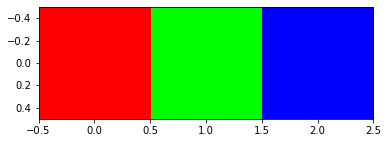

In [39]:
from PIL import Image
from matplotlib import cm
import matplotlib.pyplot as plt
pixel_rgb = [[[255, 0, 0, 255],
      [0, 255,  0, 255],
      [0, 0, 255, 255],
      ]]
plt.imshow(pixel_rgb)
# remove axis
#fig = plt.imshow(pixel_rgb)
# plt.axis('off')
# fig.axes.get_xaxis().set_visible(False)
# fig.axes.get_yaxis().set_visible(False)


## array to image 

each matrix block is a row of data, and each element within that is the pixel values in RGB-A (Red Green Blue Alpha).

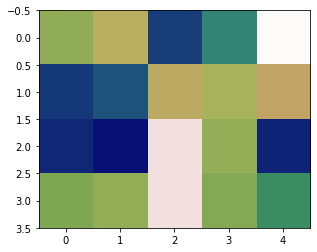

In [40]:
np.random.seed(2021) 
myarray = np.random.rand(4,5)
im = Image.fromarray(np.uint8(cm.gist_earth(myarray)*255))
im.save('images/arr2img.png')
plt.imshow(im)

具体过程详解：

adapted from https://stackoverflow.com/questions/10965417/how-to-convert-a-numpy-array-to-pil-image-applying-matplotlib-colormap.

1. First ensure your NumPy array, myarray, is normalised with the max value at 1.0.
1. Apply the colormap directly to myarray.
1. Rescale to the 0-255 range.
1. Convert to integers, using np.uint8().
1. Use Image.fromarray().

随机数生成 4x5 array, 即20像素的图片, **其大小为20x3 = 60 Bytes。**

In [41]:
myarray = np.random.rand(4,5)
print(myarray)

[[0.45214524 0.20185025 0.56930512 0.19509597 0.58370402]
 [0.47631347 0.5178144  0.82309863 0.73222503 0.06905627]
 [0.67212894 0.64348481 0.82801437 0.20446939 0.61748895]
 [0.61770101 0.30106862 0.87174059 0.58965408 0.98177009]]


apply colormap (add the 3rd dimension)

In [42]:
cm.gist_earth(myarray)

array([[[0.26771184, 0.59904649, 0.29404223, 1.        ],
        [0.13328612, 0.36951346, 0.48546295, 1.        ],
        [0.50426553, 0.66033449, 0.32793593, 1.        ],
        [0.12805921, 0.35484624, 0.48404118, 1.        ],
        [0.5301321 , 0.66721725, 0.33289364, 1.        ]],

       [[0.30632035, 0.61259164, 0.2793524 , 1.        ],
        [0.40220749, 0.63742441, 0.30449746, 1.        ],
        [0.79481623, 0.66168549, 0.49220849, 1.        ],
        [0.73236792, 0.68658485, 0.37999181, 1.        ],
        [0.04442871, 0.09008809, 0.46129296, 1.        ]],

       [[0.67886482, 0.70679308, 0.36140042, 1.        ],
        [0.6271317 , 0.69302757, 0.35148502, 1.        ],
        [0.79920254, 0.66508418, 0.50181597, 1.        ],
        [0.13589957, 0.37684706, 0.48617383, 1.        ],
        [0.58833186, 0.68270344, 0.34404847, 1.        ]],

       [[0.58833186, 0.68270344, 0.34404847, 1.        ],
        [0.19742595, 0.51326054, 0.47645582, 1.        ],
        

convert to 0 to 255 scale

In [ ]:
cm.gist_earth(myarray)*255

convert to integer with uint8

In [ ]:
np.uint8(cm.gist_earth(myarray)*255)

## Extract part of the image

In [ ]:
img = np.array(Image.open('images/arr2img.png'))
# remove alpha
# im=np.delete(im, np.s_[3], axis=2) 
print(img.shape)
# (4, 5 ,4)
# (height, width, 4)
print(img)

# Numpy image array 解读：

<img src="images/image2array.jpg" width="600px" />

Notice that the first dimension is the height, and the second dimension is the width. That is because the data is ordered by lines, then each line is ordered by pixels, and finally each pixel contains 3 byte values for RGB. Each colour is represented by an unsigned byte (numpy type uint8).

first row:

In [ ]:
im_row1 = img[0]
im_row1 = im_row1.reshape(1,5,4)
print(im_row1)

In [ ]:
plt.imshow(im_row1)

The 1st pixel:

In [ ]:
im_pixel_1st = img[0,0,:]
im_pixel_1st =im_pixel_1st.reshape(1,1,4)

In [ ]:
# pixel_1st = [[[50, 130, 121, 255]]]
plt.imshow(im_pixel_1st)

由以下三种颜色合成：

In [ ]:
pixel_1st = [[[im_pixel_1st[0,0,0], 0, 0, 255],
      [0, im_pixel_1st[0,0,1],  0, 255],
      [0, 0, im_pixel_1st[0,0,2], 255],
      ]]
plt.imshow(pixel_1st)

In [ ]:
print("The first pixel is made of RGB (R=",im_pixel_1st[0,0,0],", G=",im_pixel_1st[0,0,1],",", "B=",im_pixel_1st[0,0,2],").\n")

转换为16进制 (convert rgb to hex):

In [ ]:
'#{:02x}{:02x}{:02x}'.format(im_pixel_1st[0,0,0], im_pixel_1st[0,0,1], im_pixel_1st[0,0,2] )
'#{:02x}{:02x}{:02x}'.format( 120, 0 , 255 )

## Remove Alpha Channel

In [ ]:
im = np.array(Image.open('images/arr2img.png'))
# remove alpha
im_noalpha = np.delete(im, np.s_[3], axis=2) 
print(im_noalpha.shape)
# (4, 5 ,3)
# (height, width, 3)
print(im_noalpha)

In [ ]:
plt.imshow(im_noalpha)

# 其他模式

## CMYK

- C  cyan  蓝
- M  magenta 粉
- Y  yellow  黄
- K  black  黑

加法,颜料颜色，打印机

RGB(A): 减法， 光，电子显示

![](images/rgb-vs-cmyk.png)

# HSV

HSV是把H（色相），S（饱和度），V（亮度）当做色值来定位颜色的空间。

色相的取回值范围是0-360度，用来表答示颜色的类别。其中红色是0度，绿色是120度，蓝色是240度。

饱和度的取值范围是0%~100%。用来表示颜色的鲜艳程度，灰色的饱和度是0%，纯粹的颜色（比如大红（255,0,0）青色（0,255,255）等等的饱和度是100%。

亮度的取值范围是0%-100%，用来表示颜色的明暗程度，亮度为0%时为黑色，亮度为100%时为白色，介于0%-100%之间时，则用来表示各个颜色的明暗程度。

![](images/HSV_color_solid_cylinder_saturation_gray.png)

In [ ]:
import cv2
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hsv

In [ ]:
# %run hsv_picke2.py -f hsv -i pig.jpg

In [ ]:
# %load hsv_picke2.py